## Introduction
In this project, I am going to use the flights data set to find out the percentage of arrival delay. I want to analyize the column of ArrDelay. My imaging customer is who don't want to choose an airline with a high delay rate. Finally, I will find out the 3 carriers with the highest delay percentage.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
"""
to read the hflights and get the DataFrame . 
"""

filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
hflights_df = pd.read_csv(filename)

In [3]:
"""
Show the 5 rows
"""
hflights_df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


Before we start data analysis, summaries, and explanations of these attributes were given. The whole dataset contained 20000 rows and 21 attributes. Due to the complexity of this data set, by reading from the file, these attributes are as follows:

- Year, Month, DayofMonth: date of departure 出发日期
- DayOfWeek: day of week of departure (useful for removing weekend effects) 出发的星期第几日(适用于取消周末效果)
- DepTime: departure time (in local time, hhmm) 起飞时间
- ArrTime: arrival time (in local time, hhmm) 到达时间
- UniqueCarrier: unique abbreviation for a carrier 承运人的唯一缩写
- FlightNum: flight number 航班号
- TailNum: airplane tail number 飞机尾数
- ActualElapsedTime: elapsed time of flight, in minutes 飞行经过的时间，以分钟为单位
- AirTime: flight time, in minutes 飞行时间，以分钟为单位
- ArrDelay: arrival delay, in minutes, 到达延迟，以分钟为单位
- DepDelay: departure delay, in minutes 起飞延误，以分钟为单位
- Origin: origin airport code 起飞机场代码
- Dest: destination airport code 目的地机场代码
- Distance: distance of flight, in miles 飞行距离，单位为英里
- TaxiIn: taxi in time in minutes 几分钟滑入
- TaxiOut: taxi out time in minutes 几分钟滑出
- Cancelled: cancelled indicator: 1 = Yes, 0 = No 取消
- CancellationCode: reason for cancellation: A = carrier, B = weather, C = national air system, D = security 取消原因:A =承运人，B =天气，C =国家航空系统，D =安全
- Diverted: diverted indicator: 1 = Yes, 0 = No 转移指示

## Data Preparation

In [4]:
# To choose sub dataframe
arr_delay_df = hflights_df[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'ArrDelay']]

Deleting NaN of ArrDelay

In [5]:
# To delete all rows which ArrDealy is NaN
no_nan_arr_delay_df = arr_delay_df.dropna()

Getting ArrDelay >= 15

In [6]:
# To find out all ArrDelay is greater equal than 15
high_15_delay_df = no_nan_arr_delay_df[no_nan_arr_delay_df['ArrDelay'] >= 15]

Getting count of ArrDelay. ArrDelay >= 15

In [7]:
# To calculate mean of ArrDelay grouped by 'UniqueCarrier'
high_15_size_df = high_15_delay_df[['UniqueCarrier', 'ArrDelay']].groupby('UniqueCarrier').size()

Getting ArrDelay < 15

In [8]:
# To find out all ArrDelay is less than 15
low_15_delay_df = no_nan_arr_delay_df[no_nan_arr_delay_df['ArrDelay'] < 15]

Getting mean of ArrDelay, Grouped by UniqueCarrier.  ArrDelay < 15

In [9]:
low_15_size_df = low_15_delay_df[['UniqueCarrier', 'ArrDelay']].groupby('UniqueCarrier').size()

To concat high_15_size_df and low_15_size_df

To rename column

In [10]:
# To concat 2 df
concat_2_df = pd.concat([high_15_size_df, low_15_size_df], axis=1)

# To rename column
concat_2_df.columns = ['delays','ontimes']

Calculating percentage of ArrDelay: formular = (delays counts / (delays counts + ontime counts)) * 100

In [11]:
# To calculate percentage of delay: formular = (delays counts / (delays counts + ontime counts)) * 100
concat_2_df['percent_of_delay'] = concat_2_df.apply(lambda x : (x.delays / (x.delays + x.ontimes))*100 , axis=1)

Demostrating as a bar chart.

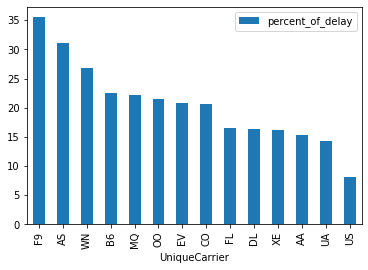

In [14]:
# To show them as a bar chart.
concat_2_df[['percent_of_delay']].sort_values(by='percent_of_delay', ascending=False).plot.bar()

## Research Results
- F9 has the highest percentage of ArrDelay in 14 carriers. In contrast, US has the lowest percentage of ArrDelay.

## Conclusion
- F9, AS and WN has high percentage of ArrDelay, over 25%.